In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
from random import random
from tabulate import tabulate
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import ExtraTreeClassifier
from contextlib import redirect_stdout
evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [3]:
saat=time.time()

In [4]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [5]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

files_add=find_the_way("./",".csv")
files_add

['./session-1-DeviceGroup-1.csv',
 './session-1-DeviceGroup-2.csv',
 './session-2-DeviceGroup-1.csv',
 './session-2-DeviceGroup-2.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_covariance_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_magnitude_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_mean_0.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_pcc_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_radius_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_std_0.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.01_weight_0.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_covariance_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_magnitude_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_mean_0.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_pcc_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_radius_0_1.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_std_0.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_0.1_weight_0.csv',
 './results\\compare\\CV\\DT_CS1D1_HH_1_covar

In [6]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier    
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import  ComplementNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier


from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn import datasets
import sklearn
import time


from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from scipy.stats import randint as sp_randint
from scipy.stats import randint as sp_randFloat
import xgboost
from catboost import CatBoostClassifier

In [7]:
ml_list={"DT": DecisionTreeClassifier(),
         "LR": LogisticRegression(),
         "BNB": BernoulliNB(),
       
         "XGB": xgboost.XGBClassifier(),
         "kNN": KNeighborsClassifier(),
         "GNB": GaussianNB(),
           "MLP": MLPClassifier(),"SVM": SVC()}

ml_list={"ET":ExtraTreeClassifier(),
"DT":DecisionTreeClassifier(),
#"OneClassSVM":OneClassSVM(),
#"MLPClassifier":MLPClassifier(),
#"ComplementNB":ComplementNB(),
###################"DummyClassifier":DummyClassifier(),         
#"RadiusNeighborsClassifier":RadiusNeighborsClassifier(),
#"KNeighborsClassifier":KNeighborsClassifier(),
#"ClassifierChain":ClassifierChain(base_estimator=DecisionTreeClassifier()),
#"MultiOutputClassifier":MultiOutputClassifier(estimator=DecisionTreeClassifier()),
#####################"OutputCodeClassifier":OutputCodeClassifier(estimator=DecisionTreeClassifier()),
#"OneVsOneClassifier":OneVsOneClassifier(estimator=DecisionTreeClassifier()),
#########################"OneVsRestClassifier":OneVsRestClassifier(estimator=DecisionTreeClassifier()),
#"SGDClassifier":SGDClassifier(),
#######################################"RidgeClassifierCV":RidgeClassifierCV(),
"Ridge":RidgeClassifier(),
############################"PassiveAggressiveClassifier    ":PassiveAggressiveClassifier    (),
#"GaussianProcessClassifier":GaussianProcessClassifier(),
#"AdaBoostClassifier":AdaBoostClassifier(),
#"GradientBoostingClassifier":GradientBoostingClassifier(),
"Bagg":BaggingClassifier(),
"ETs":ExtraTreesClassifier(),
"RF":RandomForestClassifier(),
"BNB":BernoulliNB(),
##############"CalibratedClassifierCV":CalibratedClassifierCV(),
"GNB":GaussianNB(),
#"LabelPropagation":LabelPropagation(),
#"LabelSpreading":LabelSpreading(),
"LDA":LinearDiscriminantAnalysis(),
#"LinearSVC":LinearSVC(),
"LR":LogisticRegression(),
#"LogisticRegressionCV":LogisticRegressionCV(),
#"MultinomialNB  ":MultinomialNB  (),
#########################################"NearestCentroid":NearestCentroid(),
#"NuSVC":NuSVC(),
##############################################"Perceptron":Perceptron(),
"QDA":QuadraticDiscriminantAnalysis()}
#"SVC":SVC(),    #  "XGB": xgboost.XGBClassifier(),
         #"cat":CatBoostClassifier(),
#"HistGradientBoostingClassifier":HistGradientBoostingClassifier()}
#"CategoricalNB" : CategoricalNB()}

ml_list={"DT": DecisionTreeClassifier(),
       "Bagg":BaggingClassifier()}
ml_list={"DT": DecisionTreeClassifier()}

In [8]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [9]:
folder("results/compare/SS/")
folder("results/compare/CV/")
folder("results/compare/DD/")
folder("pdfs")

## Calculation of evaluations

In [10]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [11]:
def ML(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=5
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
                try:

                    df = pd.read_csv(loop1,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_train =df[df.columns[0:-1]]
                    X_train=np.array(X_train)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_train=df[df.columns[-1]].cat.codes  
    
    
                    df = pd.read_csv(loop2,usecols=cols)#,header=None )
                    df=df.fillna(0)
                    X_test =df[df.columns[0:-1]]
                    X_test=np.array(X_test)
                    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
                    y_test=df[df.columns[-1]].cat.codes  
    
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
           
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [train,cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [12]:
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=1
    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Feature","Dataset","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):
            rnd = random()
            kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            ##df = df.reset_index(drop=True)
            df=df.fillna(0)

            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            X.shape
            for train_index, test_index in kfold.split(X):
                try:
                    X_train, X_test = X[train_index], X[test_index]
                    y_train, y_test = y[train_index], y[test_index]  
    
                    #dname=loop1  [6:-13]  
                    results_y=[]
                    cv+=1
                    results_y.append(y_test)
    
    
                    precision=[]
                    recall=[]
                    f1=[]
                    accuracy=[]
                    train_time=[]
                    test_time=[]
                    total_time=[]
                    kappa=[]
                    accuracy_b=[]
    
                        #machine learning algorithm is applied in this section
                    clf = ml_list[ii]#choose algorithm from ml_list dictionary
                    second=time.time()
                    clf.fit(X_train, y_train)
                    train_time.append(float((time.time()-second)) )
                    second=time.time()
                    predict =clf.predict(X_test)
                    test_time.append(float((time.time()-second)) )
        
                    altime=0
                    class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
                    lines.append(line)
                except:pass
        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        #print(results)
        del results["Feature"]
        del results["Dataset"]
        del results["ML"]
        del results["T"]
        del results["CV"]
        del results["ROC"]
        #print(results)
        results=results.mean()
        results=results.round(3)
        list1 = [file_list[loop1],cols[0][:15],ii]
        list1.extend(list(results.values))
  
        
        print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero, list1[0],
            list1[1],   
            list1[2][:5],
            list1[3],
            list1[4],
            list1[5],   
            list1[6],
            list1[7],
            list1[8],
            list1[9],   
            list1[10]))

        #print (tabulate(results, headers=list(results.columns)))
        #print()






In [13]:
features=['MI_dir_5_weight',
 'MI_dir_5_mean',
 'MI_dir_5_std',
 'MI_dir_3_weight',
 'MI_dir_3_mean',
 'MI_dir_3_std',
 'MI_dir_1_weight',
 'MI_dir_1_mean',
 'MI_dir_1_std',
 'MI_dir_0.1_weight',
 'MI_dir_0.1_mean',
 'MI_dir_0.1_std',
 'MI_dir_0.01_weight',
 'MI_dir_0.01_mean',
 'MI_dir_0.01_std',
 'HH_5_weight_0',
 'HH_5_mean_0',
 'HH_5_std_0',
 'HH_5_radius_0_1',
 'HH_5_magnitude_0_1',
 'HH_5_covariance_0_1',
 'HH_5_pcc_0_1',
 'HH_3_weight_0',
 'HH_3_mean_0',
 'HH_3_std_0',
 'HH_3_radius_0_1',
 'HH_3_magnitude_0_1',
 'HH_3_covariance_0_1',
 'HH_3_pcc_0_1',
 'HH_1_weight_0',
 'HH_1_mean_0',
 'HH_1_std_0',
 'HH_1_radius_0_1',
 'HH_1_magnitude_0_1',
 'HH_1_covariance_0_1',
 'HH_1_pcc_0_1',
 'HH_0.1_weight_0',
 'HH_0.1_mean_0',
 'HH_0.1_std_0',
 'HH_0.1_radius_0_1',
 'HH_0.1_magnitude_0_1',
 'HH_0.1_covariance_0_1',
 'HH_0.1_pcc_0_1',
 'HH_0.01_weight_0',
 'HH_0.01_mean_0',
 'HH_0.01_std_0',
 'HH_0.01_radius_0_1',
 'HH_0.01_magnitude_0_1',
 'HH_0.01_covariance_0_1',
 'HH_0.01_pcc_0_1',
 'HH_jit_5_weight',
 'HH_jit_5_mean',
 'HH_jit_5_std',
 'HH_jit_3_weight',
 'HH_jit_3_mean',
 'HH_jit_3_std',
 'HH_jit_1_weight',
 'HH_jit_1_mean',
 'HH_jit_1_std',
 'HH_jit_0.1_weight',
 'HH_jit_0.1_mean',
 'HH_jit_0.1_std',
 'HH_jit_0.01_weight',
 'HH_jit_0.01_mean',
 'HH_jit_0.01_std',
 'HpHp_5_weight_0',
 'HpHp_5_mean_0',
 'HpHp_5_std_0',
 'HpHp_5_radius_0_1',
 'HpHp_5_magnitude_0_1',
 'HpHp_5_covariance_0_1',
 'HpHp_5_pcc_0_1',
 'HpHp_3_weight_0',
 'HpHp_3_mean_0',
 'HpHp_3_std_0',
 'HpHp_3_radius_0_1',
 'HpHp_3_magnitude_0_1',
 'HpHp_3_covariance_0_1',
 'HpHp_3_pcc_0_1',
 'HpHp_1_weight_0',
 'HpHp_1_mean_0',
 'HpHp_1_std_0',
 'HpHp_1_radius_0_1',
 'HpHp_1_magnitude_0_1',
 'HpHp_1_covariance_0_1',
 'HpHp_1_pcc_0_1',
 'HpHp_0.1_weight_0',
 'HpHp_0.1_mean_0',
 'HpHp_0.1_std_0',
 'HpHp_0.1_radius_0_1',
 'HpHp_0.1_magnitude_0_1',
 'HpHp_0.1_covariance_0_1',
 'HpHp_0.1_pcc_0_1',
 'HpHp_0.01_weight_0',
 'HpHp_0.01_mean_0',
 'HpHp_0.01_std_0',
 'HpHp_0.01_radius_0_1',
 'HpHp_0.01_magnitude_0_1',
 'HpHp_0.01_covariance_0_1',
 'HpHp_0.01_pcc_0_1']


print(len(features))

100


In [14]:
file_list={'./session-1-DeviceGroup-1.csv':"CS1D1",
 './session-1-DeviceGroup-2.csv':"CS1D2",
 './session-2-DeviceGroup-1.csv':"CS2D1",
 './session-2-DeviceGroup-2.csv':"CS2D2"}

# CV

In [15]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(train,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/CV/ML_{file_list[train]}_{dname}.csv"
            #print(f"{list[train]} Dataset - Feature {number+1}/{len(features)}")
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            ML_CV(train,"",output_csv,feature,dname,file_list[train])
            
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorCV.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {list[train]} Dataset - Feature {dname}")
                    df = pd.read_csv(train,usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")

No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   CS1D1      MI_dir_5_weight DT         0.437      0.228      0.292      0.228      0.244      0.201      2.381      0.019     
001   CS1D1      MI_dir_5_mean   DT         0.626      0.493      0.489      0.493      0.478      0.514      0.651      0.006     
002   CS1D1      MI_dir_5_std    DT         0.468      0.231      0.278      0.231      0.244      0.257      0.68       0.016     
003   CS1D1      MI_dir_3_weight DT         0.433      0.234      0.287      0.234      0.25       0.203      1.969      0.018     
004   CS1D1      MI_dir_3_mean   DT         0.656      0.513      0.513      0.513      0.504      0.554      0.765      0.01      
005   CS1D1      MI_dir_3_std    DT         0.508      0.283      0.305      0.283      0.289      0.332      0.853      0.017     
006   CS1D1      MI_dir_1_weight DT         0.479      0.324      0.336     

In [14]:
time.time()-saat

7.001145601272583

# Session vs Session

In [15]:
file_list={"SD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-1.csv'],
"SD1T":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-1.csv'],
"SD2":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-2.csv'],
"SD2T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-2.csv']}


In [16]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/SS/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorSS.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")


No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   SD1        MI_dir_5_weight DT         0.375      0.146      0.153      0.146      0.136      0.074      10.049     0.114     
001   SD1        MI_dir_5_mean   DT         0.524      0.438      0.355      0.438      0.363      0.363      0.917      0.104     
002   SD1        MI_dir_5_std    DT         0.364      0.147      0.164      0.147      0.145      0.083      1.041      0.123     
003   SD1        MI_dir_3_weight DT         0.37       0.15       0.155      0.15       0.141      0.078      9.55       0.108     
004   SD1        MI_dir_3_mean   DT         0.549      0.41       0.337      0.41       0.351      0.379      1.027      0.108     
005   SD1        MI_dir_3_std    DT         0.382      0.194      0.183      0.194      0.177      0.132      1.156      0.145     
006   SD1        MI_dir_1_weight DT         0.377      0.182      0.177     

In [17]:
time.time()-saat

17972.10591197014

# Device vs Device

In [14]:
file_list={"DD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-2.csv'],
"DD1T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-1.csv'],
"DD2":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-2.csv'],
"DD2T":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-1.csv']}

In [15]:
print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % ("No","Dataset","Feature","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"))
for train in (file_list):
    lines=[["Feature","Dataset","ML","Acc","b_Acc","Prec","Rec","F1","kap","tra-T","test-T"]]
    df = pd.read_csv(file_list[train][0],usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    for numero,dname in enumerate(features):
        try:
            feature=[dname, 'Label']
            output_csv=f"./results/compare/DD/ML_{train}_{dname}.csv"
            strnumero=str(numero)
            strnumero=strnumero.zfill(3)
            temp=ML(file_list[train][0],file_list[train][1],output_csv,feature,dname,train)  
        except:
            print ('%-5s %-10s %-15s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s %-10s' % (strnumero,"err",dname[:15],"err","err","err","err","err","err","err","err","err"))
            with open('ErrorDD.txt', 'a') as f:
                with redirect_stdout(f):
                    print("#"*110)
                    print(f"ERROR ABOUT {train} Dataset - Feature {dname}")
                    print("TRAIN")
                    df = pd.read_csv(file_list[train][0],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("TEST")
                    df = pd.read_csv(file_list[train][1],usecols=[dname])
                    print(df.groupby(dname).size())
                    print("#"*110+"\n\n")



No    Dataset    Feature         ML         Acc        b_Acc      Prec       Rec        F1         kap        tra-T      test-T    
000   DD1        MI_dir_5_weight DT         0.247      0.145      0.113      0.145      0.081      0.07       9.261      0.102     
001   DD1        MI_dir_5_mean   DT         0.479      0.351      0.211      0.351      0.224      0.239      0.819      0.104     
002   DD1        MI_dir_5_std    DT         0.31       0.142      0.116      0.142      0.092      0.094      1.117      0.138     
003   DD1        MI_dir_3_weight DT         0.248      0.142      0.111      0.142      0.08       0.07       8.843      0.113     
004   DD1        MI_dir_3_mean   DT         0.468      0.352      0.198      0.352      0.219      0.23       0.953      0.107     
005   DD1        MI_dir_3_std    DT         0.307      0.182      0.127      0.182      0.11       0.1        1.038      0.11      
006   DD1        MI_dir_1_weight DT         0.221      0.16       0.126     

In [16]:
time.time()-saat

18122.293745279312

In [17]:
csv_results={}
for f in ["CV","SS","DD"]:
    files_add=find_the_way(f"./results\\compare\\{f}",".csv")
    csv_results[f]=[]
    for i in files_add:
        temp=i.replace("\\","/")
        temp=temp.split("_")
        if f"_{temp[1]}_" not in csv_results[f]:
            csv_results[f].append(f"_{temp[1]}_" )

In [18]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [19]:
for f in csv_results:
    folder(f"./results/mean/{f}/")
    for s in csv_results[f]:
        results=[['Feature', 'Dataset', "Folder", 'T', 'CV', 'Acc', 'b_Acc', 'Prec', 'Rec',
       'F1', 'kap', 'ROC', 'tra-T', 'test-T']]
        temp=find_the_way(f"./results/compare/{f}",s)
        files_add=[]
        for i in temp:
            files_add.append(i.replace("\\","/"))
            
            
        for i in tqdm(files_add):
            df=pd.read_csv(i)

            temp=df.values
            df = df.apply(pd.to_numeric, errors='coerce')
            df=df.mean()

            df = df.dropna()
            try:
                temp=list(temp[0][:2])
            except:
                temp=[i[i.find(s)+len(s)+1:-4]]
                temp.append(s)
            temp.append(f)
            temp.extend(list(df.values))
            results.append(temp)
        results = pd.DataFrame (results[1:], columns = results[0])
        results.to_csv(f"./results/mean/{f}/{s[1:-1]}.csv",index=False)
        

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 219.72it/s]


In [20]:
csv_results={'CV': ['_CS1D1_', '_CS1D2_', '_CS2D1_', '_CS2D2_'],
 'SS': ['_SD1T_', '_SD1_', '_SD2T_', '_SD2_'],
 'DD': ['_DD1T_', '_DD1_', '_DD2T_', '_DD2_']}

In [21]:
flag=1
totaldf=pd.DataFrame()
for i in csv_results:
    tempdf=pd.DataFrame()
    files_add=find_the_way(f"./results/mean/{i}",".csv")
    for n, ii in enumerate(files_add):
        df=pd.read_csv(ii,usecols=["Feature","kap"])
        if flag:
            totaldf["Feature"]=df["Feature"]
            flag=0
        del df["Feature"]
        tempdf[f"{i}_{n}"]=df["kap"]
    totaldf[i]=tempdf.mean(axis=1)
totaldf




,Feature,CV,SS,DD
0,HH_0.01_covariance_0_1,0.145917,0.114222,0.046837
1,HH_0.01_magnitude_0_1,0.384157,0.289623,0.162892
2,HH_0.01_mean_0,0.394711,0.308683,0.172417
3,HH_0.01_pcc_0_1,0.088190,0.068252,0.025459
4,HH_0.01_radius_0_1,0.520980,0.280996,0.205287
...,...,...,...,...
95,MI_dir_3_std,0.375339,0.203406,0.118632
96,MI_dir_3_weight,0.312494,0.169793,0.069889
97,MI_dir_5_mean,0.592994,0.403394,0.278757
98,MI_dir_5_std,0.303953,0.149032,0.106341


In [22]:
cleandf=[list(totaldf.columns)]
limit=0.01
for i in totaldf.values:
    if (math.isnan(i[1]) and math.isnan(i[2]) and math.isnan(i[3]) ) or (i[1]<limit and i[2]<limit  and i[3]<limit   ):
        print(i)
    else:
        cleandf.append(list(i))
cleandf = pd.DataFrame (cleandf[1:], columns = cleandf[0])   
print(len(cleandf))
cleandf

100


,Feature,CV,SS,DD
0,HH_0.01_covariance_0_1,0.145917,0.114222,0.046837
1,HH_0.01_magnitude_0_1,0.384157,0.289623,0.162892
2,HH_0.01_mean_0,0.394711,0.308683,0.172417
3,HH_0.01_pcc_0_1,0.088190,0.068252,0.025459
4,HH_0.01_radius_0_1,0.520980,0.280996,0.205287
...,...,...,...,...
95,MI_dir_3_std,0.375339,0.203406,0.118632
96,MI_dir_3_weight,0.312494,0.169793,0.069889
97,MI_dir_5_mean,0.592994,0.403394,0.278757
98,MI_dir_5_std,0.303953,0.149032,0.106341


In [23]:
cleandf.head(20)

,Feature,CV,SS,DD
0,HH_0.01_covariance_0_1,0.145917,0.114222,0.046837
1,HH_0.01_magnitude_0_1,0.384157,0.289623,0.162892
2,HH_0.01_mean_0,0.394711,0.308683,0.172417
3,HH_0.01_pcc_0_1,0.088190,0.068252,0.025459
4,HH_0.01_radius_0_1,0.520980,0.280996,0.205287
5,HH_0.01_std_0,0.525152,0.306087,0.211872
6,HH_0.01_weight_0,0.476764,0.250726,0.181528
7,HH_0.1_covariance_0_1,0.067179,0.049988,0.005343
8,HH_0.1_magnitude_0_1,0.314757,0.206171,0.130609
9,HH_0.1_mean_0,0.333958,0.207079,0.113909


In [24]:
cleandf

,Feature,CV,SS,DD
0,HH_0.01_covariance_0_1,0.145917,0.114222,0.046837
1,HH_0.01_magnitude_0_1,0.384157,0.289623,0.162892
2,HH_0.01_mean_0,0.394711,0.308683,0.172417
3,HH_0.01_pcc_0_1,0.088190,0.068252,0.025459
4,HH_0.01_radius_0_1,0.520980,0.280996,0.205287
...,...,...,...,...
95,MI_dir_3_std,0.375339,0.203406,0.118632
96,MI_dir_3_weight,0.312494,0.169793,0.069889
97,MI_dir_5_mean,0.592994,0.403394,0.278757
98,MI_dir_5_std,0.303953,0.149032,0.106341


In [25]:
ii[1]

'/'

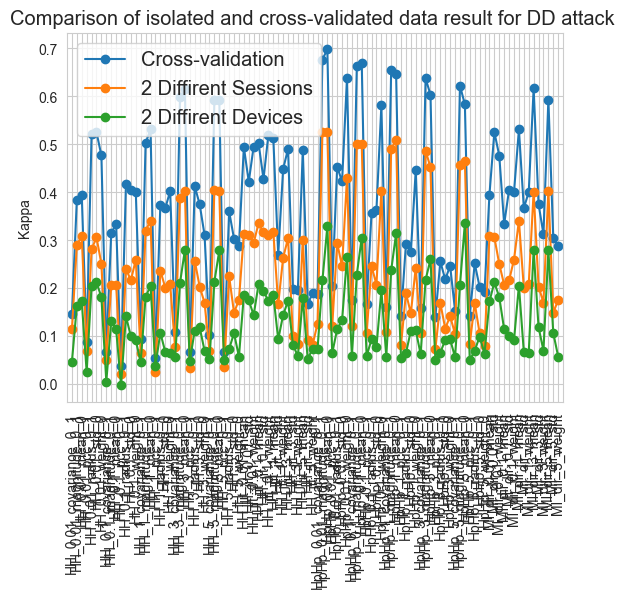

In [26]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
import matplotlib.pylab as pylab
sns.set_style("whitegrid")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'x-large'}
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }
for i in method: 
        graph_name=f"./pdfs/Comparison_kappa_{i}.pdf"
        plt.margins(x=0.01)
        my_xticks=cleandf["Feature"]#list(iso.index)
        pylab.rcParams.update(params)
        #plt.figure(figsize=(10,10))
        #plt.plot(my_xticks,iso['Acc'], linestyle='--', marker='.', color='b',label= "Separate Train & Test acc")
        #plt.plot(my_xticks,cv['Acc'], linestyle='--', marker='.', color='r',label= "10-Fold CV acc")
        plt.plot(my_xticks,cleandf[i], linestyle='-', marker='o',label= method[i])


    


plt.title(f"Comparison of isolated and cross-validated data result for {i} attack ")
plt.legend(numpoints=1)
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel("Kappa")
plt.xticks(rotation=90) 
#plt.ylim([0.69, 0.71]) 
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()
    
    

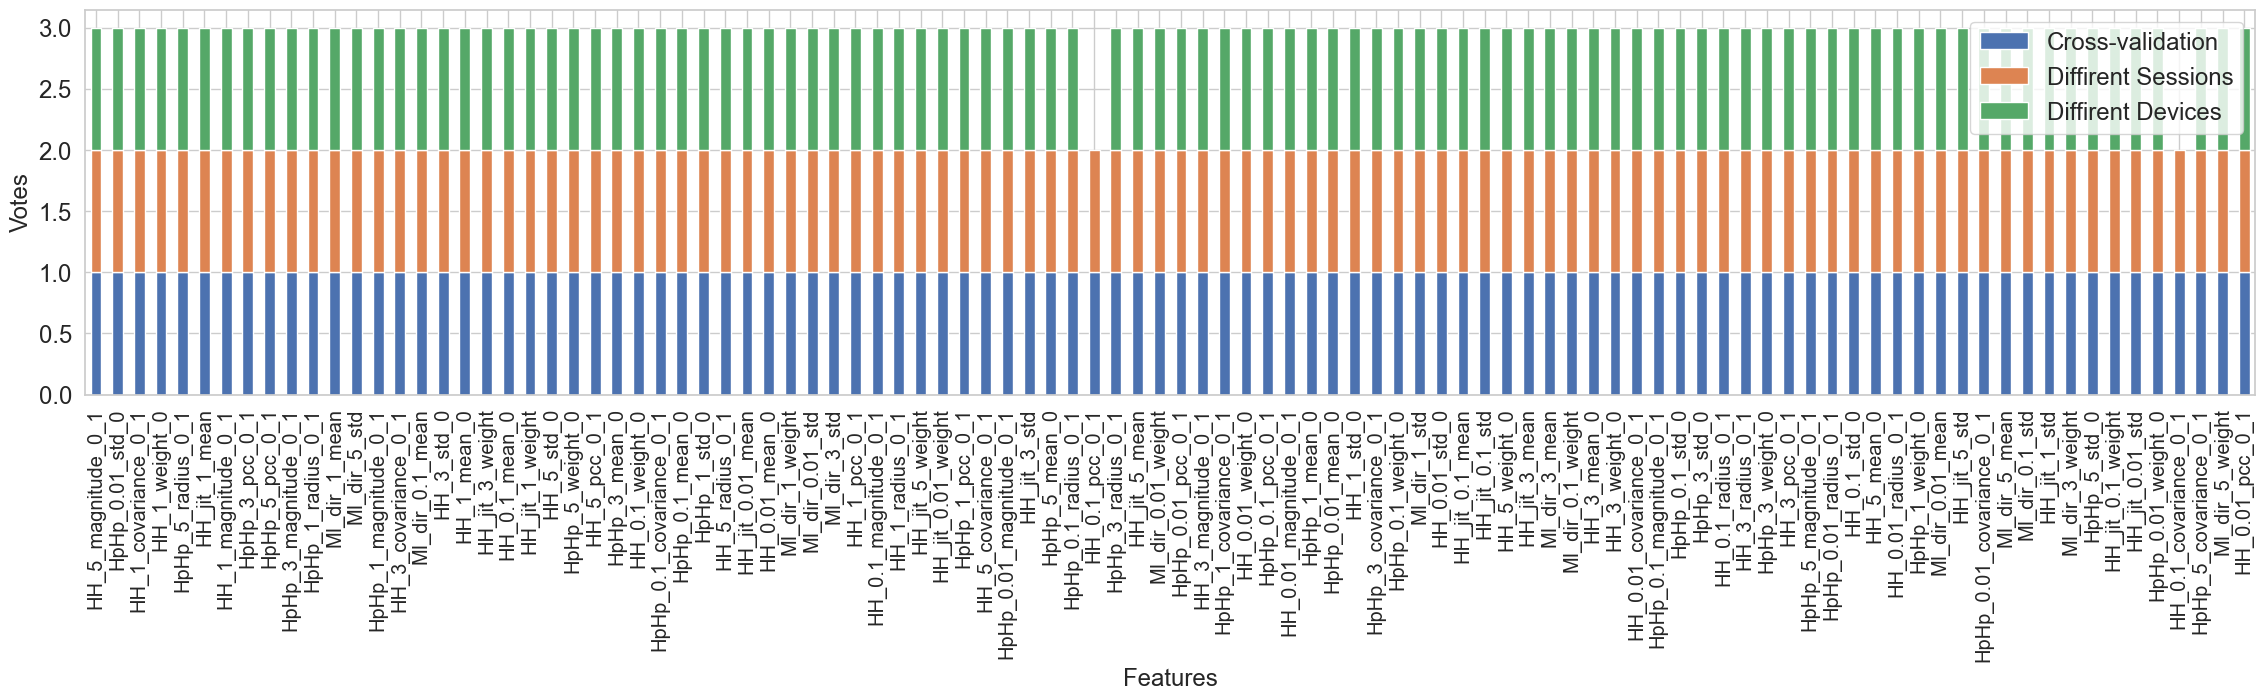

In [27]:
method={"CV":"Cross-validation","SS":"2 Diffirent Sessions","DD":"2 Diffirent Devices" }

cv=[]
ss=[]
dd=[]
limit=0.01
for i in totaldf.values:
    if i[1]>limit:
        cv.append(i[0])
    if i[2]>limit:
        ss.append(i[0])
    if i[3]>limit:
        dd.append(i[0])
main=cv+ss+dd
main=list(set(main))

mainlist=[]
for i in main:
    temp=[i,int(i in cv),int(i in ss),int(i in dd)]
    mainlist.append(temp)
data=pd.DataFrame(mainlist, columns=["Feature", "Cross-validation","Diffirent Sessions","Diffirent Devices"]).set_index('Feature')

graph_name=f"./pdfs/kappa_Voting2.PDF"
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.rcParams.update(params)
import matplotlib.pylab as pylab

#pylab.rcParams.update(params)

data.plot.bar(stacked=True,figsize=(28,5))
plt.xlabel('Features')
plt.ylabel('Votes')
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()


GA_input_features=[]
for i in main:
    if i in dd:
        GA_input_features.append(i)
    elif (i in ss) and (i in cv):
        GA_input_features.append(i)
        
        
        


In [28]:
len(GA_input_features)

100

In [29]:
len(main)

100

In [30]:
GA_input_features

['HH_5_magnitude_0_1',
 'HpHp_0.01_std_0',
 'HH_1_covariance_0_1',
 'HH_1_weight_0',
 'HpHp_5_radius_0_1',
 'HH_jit_1_mean',
 'HH_1_magnitude_0_1',
 'HpHp_3_pcc_0_1',
 'HpHp_5_pcc_0_1',
 'HpHp_3_magnitude_0_1',
 'HpHp_1_radius_0_1',
 'MI_dir_1_mean',
 'MI_dir_5_std',
 'HpHp_1_magnitude_0_1',
 'HH_3_covariance_0_1',
 'MI_dir_0.1_mean',
 'HH_3_std_0',
 'HH_1_mean_0',
 'HH_jit_3_weight',
 'HH_0.1_mean_0',
 'HH_jit_1_weight',
 'HH_5_std_0',
 'HpHp_5_weight_0',
 'HH_5_pcc_0_1',
 'HpHp_3_mean_0',
 'HH_0.1_weight_0',
 'HpHp_0.1_covariance_0_1',
 'HpHp_0.1_mean_0',
 'HpHp_1_std_0',
 'HH_5_radius_0_1',
 'HH_jit_0.01_mean',
 'HH_0.01_mean_0',
 'MI_dir_1_weight',
 'MI_dir_0.01_std',
 'MI_dir_3_std',
 'HH_1_pcc_0_1',
 'HH_0.1_magnitude_0_1',
 'HH_1_radius_0_1',
 'HH_jit_5_weight',
 'HH_jit_0.01_weight',
 'HpHp_1_pcc_0_1',
 'HH_5_covariance_0_1',
 'HpHp_0.01_magnitude_0_1',
 'HH_jit_3_std',
 'HpHp_5_mean_0',
 'HpHp_0.1_radius_0_1',
 'HH_0.1_pcc_0_1',
 'HpHp_3_radius_0_1',
 'HH_jit_5_mean',
 'MI_dir

In [31]:
!shutdown /s /t 360